In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df_ventasm = pd.read_csv(r'C:\Users\ivan_pinar\Dropbox\Creación de MOCs\MOC Master Python Análisis de Datos\Datasets\10.5\Ventas_m.csv',encoding = "ISO-8859-1",delimiter=';',parse_dates=True)

In [34]:
df_ventasm["Fecha"]=pd.to_datetime(df_ventasm["Fecha"])

In [35]:
df_ventasm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2821 entries, 0 to 2820
Data columns (total 9 columns):
ID_Pedido             2821 non-null int64
Unidades              2821 non-null int64
Precio Unitario       2821 non-null object
Total Venta           2821 non-null object
Fecha                 2819 non-null datetime64[ns]
Línea de Producto     2821 non-null object
Código de Producto    2821 non-null object
País                  2821 non-null object
Territorio            1747 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 198.5+ KB


In [37]:
df_ventasm.index=df_ventasm["Fecha"]
df_ventasm.drop("Fecha",axis=1,inplace=True)

In [41]:
df_ventasm["Total Venta"]=df_ventasm["Total Venta"].apply(lambda x:x.replace(",","."))
df_ventasm["Precio Unitario"]=df_ventasm["Precio Unitario"].apply(lambda x:x.replace(",","."))
df_ventasm["Total Venta"]=pd.to_numeric(df_ventasm["Total Venta"])
df_ventasm["Precio Unitario"]=pd.to_numeric(df_ventasm["Precio Unitario"])

In [42]:
df_ventasm.head()

,ID_Pedido,Unidades,Precio Unitario,Total Venta,Línea de Producto,Código de Producto,País,Territorio
Fecha,,,,,,,,
2020-02-24,2,30,95.70,2871.00,Motorcycles,S10_1678,USA,NaN
2020-05-07,5,34,81.35,2765.90,Motorcycles,S10_1678,France,EMEA
2020-07-01,2,41,94.74,3884.34,Motorcycles,S10_1678,France,EMEA
2020-08-25,6,45,83.26,3746.70,Motorcycles,S10_1678,USA,NaN
2020-10-10,14,0,100.00,0.00,Motorcycles,S10_1678,USA,NaN


In [52]:
df_res = df_ventasm.groupby(df_ventasm.index)[["Total Venta","Unidades"]].agg("sum")

In [53]:
df_res

,Total Venta,Unidades
Fecha,,
2020-01-06,12133.25,151
2020-01-09,11432.34,142
2020-01-10,6864.05,80
2020-01-29,54702.00,541
2020-01-31,44621.96,443
...,...,...
2022-05-13,31821.90,259
2022-05-17,59475.10,509
2022-05-29,51233.18,607


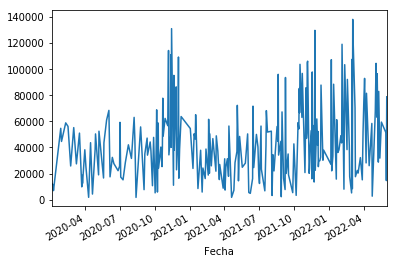

In [54]:
df_res["Total Venta"].plot()

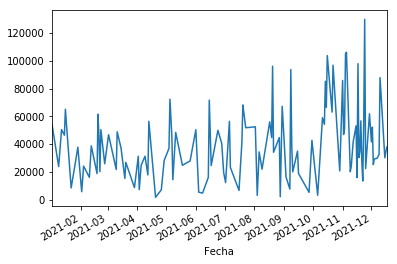

In [55]:
df_res.loc["2021","Total Venta"].plot()

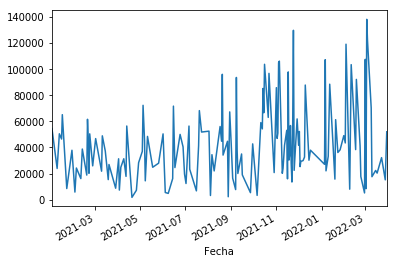

In [56]:
df_res.loc["2021-01-01":"2022-03-31","Total Venta"].plot()

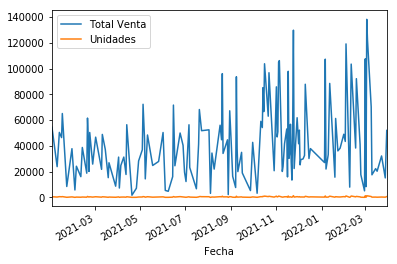

In [58]:
df_res.loc["2021-01-01":"2022-03-31",["Total Venta","Unidades"]].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAE83F3278>,
      dtype=object)

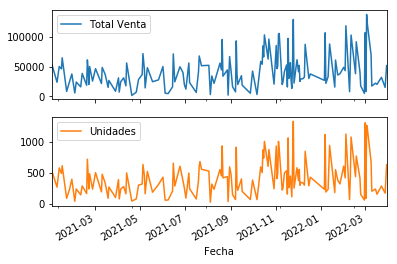

In [59]:
df_res.loc["2021-01-01":"2022-03-31",["Total Venta","Unidades"]].plot(subplots=True)

# Ejercicio

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_sp500 = pd.read_csv(r'C:\Users\ivan_pinar\Dropbox\Creación de MOCs\MOC Master Python Análisis de Datos\Datasets\10.5\SP500_data_2019_2020.csv',encoding = "ISO-8859-1",delimiter=',',parse_dates=True,index_col="Date")

In [6]:
df_sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000


In [ ]:
#Visualice la evolución con los datos diarios del cierre del índice.

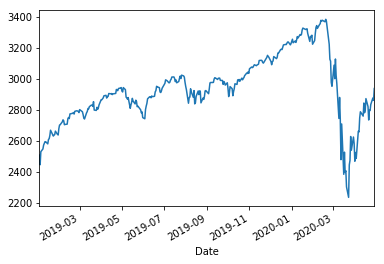

In [7]:
df_sp500["Close"].plot()

In [ ]:
#Remuestreo de los datos para diezmar a nivel mensual, ¿se aprecia la reducción del número de muestras en el gráfico?

In [11]:
df_sp500_diezm = df_sp500.resample("M").mean()

In [12]:
df_sp500_diezm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,2597.898589,2617.177130,2584.994780,2607.389997,2607.389997,3.828649e+09
2019-02-28,2750.142141,2761.412636,2742.447895,2754.864206,2754.864206,3.693865e+09
2019-03-31,2803.595250,2815.765706,2789.842843,2803.983794,2803.983794,3.742680e+09
2019-04-30,2900.810489,2908.761893,2892.648100,2903.799979,2903.799979,3.314516e+09
2019-05-31,2855.352728,2870.230901,2838.755016,2854.705910,2854.705910,3.493642e+09


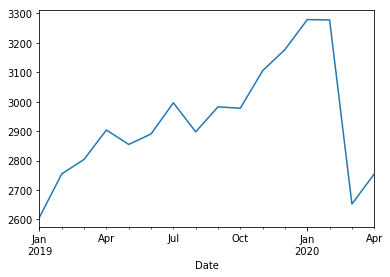

In [13]:
df_sp500_diezm["Close"].plot()

In [ ]:
#Remuestreo de los datos interpolando con el método “quadratic” cada 6h, ¿se aprecia un suavizado del gráfico respecto al original?

In [14]:
df_sp500_interp = df_sp500.resample("6H").interpolate(method="quadratic")

In [15]:
df_sp500_interp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02 00:00:00,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3.733160e+09
2019-01-02 06:00:00,2484.562782,2504.814691,2455.600001,2477.823454,2477.823454,3.718799e+09
2019-01-02 12:00:00,2489.590382,2495.531242,2447.725009,2456.731239,2456.731239,3.728962e+09
2019-01-02 18:00:00,2492.042762,2491.639642,2443.844996,2446.753386,2446.753386,3.763649e+09
2019-01-03 00:00:00,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3.822860e+09


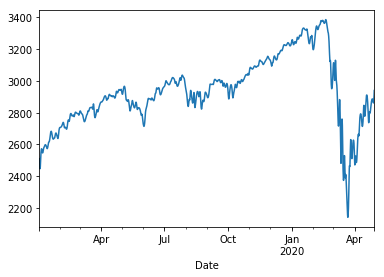

In [16]:
df_sp500_interp["Close"].plot()

In [ ]:
#¿Qué ocurrió con el cierre del índice en el intervalo entre el día 04/02/2020 y 06/02/2020?

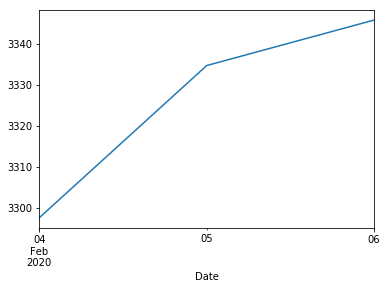

In [18]:
df_sp500.loc["2020/02/04":"2020/02/06","Close"].plot()

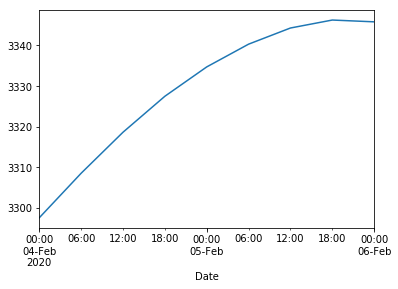

In [20]:
df_sp500_interp.loc["2020/02/04 0:00":"2020/02/06 0:00","Close"].plot()